AttributeError: module 'base' has no attribute 'head'

In [4]:
from rpy2.robjects.packages import importr
base = importr('base')

In [5]:
from rpy2.robjects.packages import importr
base = importr('base')
stats = importr('stats')
graphics = importr('graphics')
plot = graphics.plot
rnorm = stats.rnorm
plot(rnorm(100), ylab="random")

rpy2.rinterface.NULL

In [4]:
import rpy2.robjects as ro

In [3]:
data = r('iris')
data.head(2)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.100000,3.500000,1.400000,0.200000,setosa
4.900000,3.000000,1.400000,0.200000,setosa


In [ ]:
%load_ext rpy2.ipython
from rpy2.robjects import r

In [3]:
r('iris').head()

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.100000,3.500000,1.400000,0.200000,setosa
4.900000,3.000000,1.400000,0.200000,setosa
4.700000,3.200000,1.300000,0.200000,setosa
4.600000,3.100000,1.500000,0.200000,setosa
5.000000,3.600000,1.400000,0.200000,setosa
5.400000,3.900000,1.700000,0.400000,setosa


In [2]:
%load_ext rpy2.ipython
from rpy2.robjects import r

In [1]:
from rpy2.robjects import r
r('iris').head(2)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.100000,3.500000,1.400000,0.200000,setosa
4.900000,3.000000,1.400000,0.200000,setosa


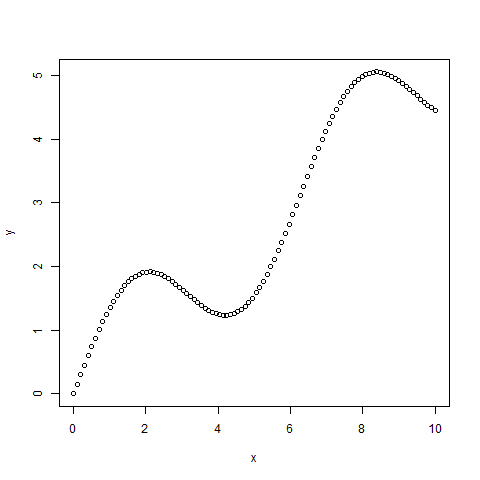

In [13]:
from numpy import linspace,sin
x = linspace(0,10,100)
y = sin(x)+0.5*x
%R -i x
%R -i y
%R plot(x,y)

In [12]:
data = %R iris

TypeError: Parameter 'categories' must be list-like, was <rpy2.rinterface.StrSexpVector - Python:0x00000248B092CFD8 / R:0x000002482A4B0048>

In [11]:
%R -o data
data = iris

TypeError: Parameter 'categories' must be list-like, was <rpy2.rinterface.StrSexpVector - Python:0x00000248B092CF18 / R:0x000002482A4B0048>

In [7]:
import rpy2.rinterface

In [1]:
%load_ext rpy2.ipython

C:\ProgramData\Anaconda3\envs\py36\lib\site-packages\rpy2\robjects\pandas2ri.py:17: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex


In [ ]:
data = r('iris')
data.head()

In [ ]:
from rpy2 import robjects
r = robjects.r

In [31]:
#输出预测概率
temp = test.copy()
tem=temp.pop('income')
pre = model.predict(temp)
#预测标签（默认阈值0.5）
# 生成预测标签
pre_label = (pre>0.5).astype('int')
#输出分类报告，Y的真实值，Y的预测标签
# 模型评估（召回率），选择0.5为阈值
from sklearn.metrics import classification_report # 用于分类报告
print(classification_report(tem, pre_label))
# precision 精确率；recall 召回率 ；f1-score 相当于精确率与召回率的平均

              precision    recall  f1-score   support

           0       0.84      0.95      0.89     17267
           1       0.74      0.44      0.55      5526

    accuracy                           0.83     22793
   macro avg       0.79      0.69      0.72     22793
weighted avg       0.81      0.83      0.81     22793



In [30]:
formula = 'income~age+fnlwgt+education_num+sex+capital_gain+capital_loss+hr_per_week+type_1+type_2+type_3+type_4+type_5+type_6+type_7+race_1+race_2+race_3+race_4'
#实例化
model = smf.logit(formula=formula, data=train)
#拟合模型
model = model.fit()
#输出拟合结果
model.summary()

         Current function value: 0.383370
         Iterations: 35


C:\Users\fzh00\AppData\Roaming\Python\Python310\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 income   No. Observations:                 9768
Model:                          Logit   Df Residuals:                     9749
Method:                           MLE   Df Model:                           18
Date:                Tue, 21 Mar 2023   Pseudo R-squ.:                  0.2999
Time:                        13:09:01   Log-Likelihood:                -3744.8
converged:                      False   LL-Null:                       -5348.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -9.2991      0.291    -31.980      0.000      -9.869      -8.729
age               0.0426      0.002     17.725      0.000       0.038       0.047
fnlwgt         5.696e-07   2.86e-07      1.990      0.047    8.56e-09    1.13e-06
education_num     0.3302      0.013     24.973      0.000       0.304       0.356
sex               1.1950      0.075     15.845      0.000       1.047       1.343
capital_gain      0.0003   1.85e-05     17.702      0.000       0.000       0.000
capital_loss      0.0007   5.98e-05     11.569      0.000       0.001       0.001
hr_per_week       0.0298      0.003     11.673      0.000       0.025       0.035
type_1            0.1301      0.180      0.721      0.471      -0.224       0.484
type_2            0.4454      0.156      2.861      0.004       0.140       0.751
type_3            1.0141      0.208      4.886      0.000       0.607       1.421
type_4            0.3818      0.183      2.084      0.037       0.023       0.741
type_5           -0.3708      0.233     -1.593      0.111      -0.827       0.085
type_6            0.6808      0.203      3.349      0.001       0.282       1.079
type_7          -14.5452   9165.235     -0.002      0.999    -1.8e+04    1.79e+04
race_1           -0.4809      0.121     -3.970      0.000      -0.718      -0.243
race_2           -0.0407      0.159     -0.255      0.798      -0.353       0.271
race_3           -0.6442      0.355     -1.815      0.070      -1.340       0.052
race_4           -1.2103      0.519     -2.330      0.020      -2.228      -0.192
=================================================================================
"""

In [22]:
train.head()

,age,fnlwgt,education_num,sex,capital_gain,capital_loss,hr_per_week,income,type_1,type_2,type_3,type_4,type_5,type_6,type_7,type_8,race_1,race_2,race_3,race_4
27487,58,215190,7,1,0,0,20,0,0,1,0,0,0,0,0,0,0,0,0,0
8959,27,123116,9,1,0,0,40,0,1,0,0,0,0,0,0,0,0,0,0,0
25278,46,441542,13,1,0,0,40,0,0,0,0,1,0,0,0,0,1,0,0,0
22438,28,197905,9,1,0,0,50,0,0,1,0,0,0,0,0,0,0,0,0,0
14415,64,134378,14,1,0,0,50,1,0,1,0,0,0,0,0,0,0,0,0,0


In [20]:
#划分数据集
from sklearn.model_selection import train_test_split
# train, test= train_test_split(df4, test_size= 0.3,random_state= 6)
train,test = train_test_split(df4,train_size=0.3,random_state=0)

In [14]:
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [13]:
df4 = df3.copy()

In [12]:
df3['income']=df3['income'].replace({'<=50K\n':0,'>50K\n':1})
df3.income.value_counts()

0    24720
1     7841
Name: income, dtype: int64

In [10]:
df3.drop(['type_employer','race'],axis=1,inplace=True)

In [9]:
dummy_race = pd.get_dummies(df2['race'], prefix='race', drop_first=True)
df2=df2.join(dummy_race)
df3=df2.copy()

In [8]:
label_race = df2['race'].unique().tolist()
label_race
#对原数据进行编码
df2['race'] = df2['race'].apply(lambda x: label_race.index(x))
df2.head()

['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other']

,age,type_employer,fnlwgt,education_num,race,sex,capital_gain,capital_loss,hr_per_week,income,type_1,type_2,type_3,type_4,type_5,type_6,type_7,type_8
0,39,0,77516,13,0,1,2174,0,40,<=50K\n,0,0,0,0,0,0,0,0
1,50,1,83311,13,0,1,0,0,13,<=50K\n,1,0,0,0,0,0,0,0
2,38,2,215646,9,0,1,0,0,40,<=50K\n,0,1,0,0,0,0,0,0
3,53,2,234721,7,1,1,0,0,40,<=50K\n,0,1,0,0,0,0,0,0
4,28,2,338409,13,1,0,0,0,40,<=50K\n,0,1,0,0,0,0,0,0


In [7]:
df2=df2.join(dummy)

In [6]:
dummy = pd.get_dummies(df2['type_employer'], prefix='type', drop_first=True)
dummy.tail()

,type_1,type_2,type_3,type_4,type_5,type_6,type_7,type_8
32556,0,1,0,0,0,0,0,0
32557,0,1,0,0,0,0,0,0
32558,0,1,0,0,0,0,0,0
32559,0,1,0,0,0,0,0,0
32560,0,0,0,0,0,1,0,0


In [5]:
df2['sex']=df2['sex'].replace({'Male':1,'Female':0})
df2.head()

,age,type_employer,fnlwgt,education_num,race,sex,capital_gain,capital_loss,hr_per_week,income
0,39,0,77516,13,White,1,2174,0,40,<=50K\n
1,50,1,83311,13,White,1,0,0,13,<=50K\n
2,38,2,215646,9,White,1,0,0,40,<=50K\n
3,53,2,234721,7,Black,1,0,0,40,<=50K\n
4,28,2,338409,13,Black,0,0,0,40,<=50K\n


In [4]:
df2 = df.copy()
label = df2['type_employer'].unique().tolist()
label
#对原数据进行编码
df2['type_employer'] = df2['type_employer'].apply(lambda x: label.index(x))
df2.drop(['education','marital','occupation','relationship','country'],axis=1,inplace=True)

['State-gov',
 'Self-emp-not-inc',
 'Private',
 'Federal-gov',
 'Local-gov',
 '?',
 'Self-emp-inc',
 'Without-pay',
 'Never-worked']

In [3]:
df = pd.DataFrame(data) #  Two-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled axes

df.columns = ['age', 'type_employer', 'fnlwgt', 'education',
              "education_num","marital", "occupation", "relationship", "race","sex",
              "capital_gain", "capital_loss", "hr_per_week","country","income"]
df.head(3)

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K\n
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K\n
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K\n


In [2]:
import pandas as pd
import numpy as np
import os
os.__file__
os.chdir(r'C:\Data\Jupyter_file\DataScienceUB\introduction-datascience-python-book\files')
file = open('ch03/adult.data', 'r')
def chr_int(a):
    if a.isdigit():
        return int(a)
    else:
        return 0

data=[]
for line in file:
    data1=line.split(', ')
    if len(data1)==15:
        data.append([chr_int(data1[0]),data1[1],chr_int(data1[2]),data1[3],chr_int(data1[4]),data1[5],data1[6],\
            data1[7],data1[8],data1[9],chr_int(data1[10]),chr_int(data1[11]),chr_int(data1[12]),data1[13],\
            data1[14]])


'C:\\ProgramData\\Anaconda3\\envs\\cda_python\\lib\\os.py'

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore")